<a href="https://colab.research.google.com/github/yaduyk7/LeetCodeChallenge/blob/main/IOT_Project_Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset=keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Ml_data"
)
datadir="/content/drive/MyDrive/Ml_data"

In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

target=[]
images=[]
flattened_data=[]

categories=['Elephant','Rhino','Zebra']
for category in categories:
  class_num=categories.index(category) #Label Encoding values
  #print(class_num)
  path=os.path.join(datadir,category)
  #Image processing
  for img in os.listdir(path): #takes out each image_name from the folder
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))  #also normalizes the value between 0 to 1
    flattened_data.append(img_resized)
    images.append(img_resized)
    target.append(class_num)

flattened_data=np.array(flattened_data)
target=np.array(target)
images=np.array(images)





[[[[4.88064588e-02 9.09510138e-02 3.57254443e-02]
   [7.10974238e-02 1.22778179e-01 2.75635848e-02]
   [8.81452650e-02 1.52164580e-01 2.12766062e-02]
   ...
   [4.74069585e-02 7.29303594e-02 6.04854844e-02]
   [8.42567250e-02 9.28455137e-02 7.60752164e-02]
   [8.05626645e-02 7.77545795e-02 5.26847824e-02]]

  [[7.85789200e-02 1.23238833e-01 5.16543674e-02]
   [6.46985881e-02 1.12853894e-01 3.85310351e-02]
   [7.33929488e-02 1.29741567e-01 2.88487657e-02]
   ...
   [4.86145504e-02 6.87504598e-02 5.39665192e-02]
   [5.64989606e-02 7.40923274e-02 5.51066664e-02]
   [5.29956953e-02 7.20520850e-02 4.60769644e-02]]

  [[8.57082429e-02 1.32457468e-01 4.97061683e-02]
   [5.60261516e-02 1.02249981e-01 4.01512022e-02]
   [6.04467454e-02 1.11978950e-01 3.92701327e-02]
   ...
   [4.57914946e-02 5.29596857e-02 4.17944503e-02]
   [5.09999499e-02 5.87923359e-02 3.82807227e-02]
   [5.78663547e-02 7.04005375e-02 4.62787260e-02]]

  ...

  [[4.34124514e-01 5.47752925e-01 3.51401675e-01]
   [4.47871733e-

In [ ]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(flattened_data, target, test_size=0.2, random_state=109)

In [ ]:
#Building model
ann=models.Sequential([
    layers.Flatten(input_shape=(150,150,3)),
    layers.Dense(2000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(3, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,Y_train,epochs=5)

In [ ]:
#CNN
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
cnn.fit(X_train,Y_train,epochs=15)

Epoch 1/15
2/2 [==============================] - 4s 1s/step - loss: 3.3720 - accuracy: 0.2679
Epoch 2/15
2/2 [==============================] - 3s 1s/step - loss: 1.4624 - accuracy: 0.3214
Epoch 3/15
2/2 [==============================] - 2s 648ms/step - loss: 1.1989 - accuracy: 0.3393
Epoch 4/15
2/2 [==============================] - 2s 714ms/step - loss: 1.0386 - accuracy: 0.4107
Epoch 5/15
2/2 [==============================] - 2s 687ms/step - loss: 0.9590 - accuracy: 0.5357
Epoch 6/15
2/2 [==============================] - 2s 749ms/step - loss: 0.8707 - accuracy: 0.5893
Epoch 7/15
2/2 [==============================] - 2s 702ms/step - loss: 0.9364 - accuracy: 0.4643
Epoch 8/15
2/2 [==============================] - 2s 693ms/step - loss: 0.7545 - accuracy: 0.8214
Epoch 9/15
2/2 [==============================] - 2s 916ms/step - loss: 0.8181 - accuracy: 0.5179
Epoch 10/15
2/2 [==============================] - 3s 1s/step - loss: 0.6714 - accuracy: 0.6607
Epoch 11/15
2/2 [===========

In [ ]:
cnn.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 267ms/step - loss: 0.4732 - accuracy: 0.7333


[0.47316378355026245, 0.7333333492279053]

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(categories[y[index]])
    plt.show()

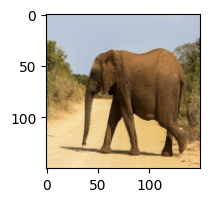

In [ ]:
plot_sample(X_test,Y_test,1)

In [ ]:
Y_pred=cnn.predict(X_test)
Y_pred[:5]

1/1 [==============================] - 1s 612ms/step


array([[1.9085082e-03, 3.5941173e-04, 9.9773210e-01],
       [5.5028296e-01, 1.7471060e-01, 2.7500656e-01],
       [8.1663138e-01, 1.4146358e-01, 4.1905094e-02],
       [3.4026083e-01, 6.3976300e-01, 1.9976156e-02],
       [6.9575000e-01, 2.0285228e-01, 1.0139761e-01]], dtype=float32)

In [ ]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:5]

[2, 0, 0, 1, 0]

In [ ]:
#Y_test[:5]
plot_sample(X_test,Y_test,1)
print("Prediction=",categories[Y_classes[1]])


NameError: name 'plot_sample' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 31ms/step
[[0.53966    0.2923577  0.16798234]]
Predicted Class: Elephant


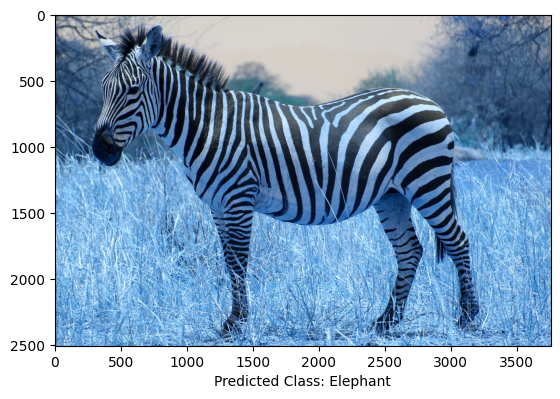

In [ ]:
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Function to load and preprocess a new image
def load_and_preprocess_image(image_path):
    new_image = cv2.imread(image_path)
    resized_image = resize(new_image, (150, 150, 3))
    normalized_image = resized_image / 255.0
    input_image = np.expand_dims(normalized_image, axis=0)
    return input_image

# Path to the new image in Google Drive
new_image_path = "/content/drive/MyDrive/Zebra_(24694097565).jpg"

# Load and preprocess the new image
input_image = load_and_preprocess_image(new_image_path)

# Make predictions
predictions = cnn.predict(input_image)
print(predictions)

# Get the predicted class (index with the maximum probability)
predicted_class = np.argmax(predictions, axis=1)

# Print or use the predicted class
print("Predicted Class:", categories[predicted_class[0]])

# Display the new image and the predicted class
plt.imshow(cv2.imread(new_image_path))
plt.xlabel("Predicted Class: " + categories[predicted_class[0]])
plt.show()
